In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# add additional columns like selfemp, insurance, married, ethnicity, education
health_expense_data = pd.read_csv("../data/medical_insurance.csv")
health_expense_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
len(health_expense_data)

2772

In [4]:
age_bins = [0, 20, 40, 60, 80, 100]
health_expense_data['age_bin'] = pd.cut(health_expense_data['age'], bins=age_bins, labels=['0-20', '20-40', '40-60', '60-80', '80-100'])
health_expense_data = health_expense_data.sort_values(by='age_bin').reset_index(drop=True)

In [5]:
med_insurance = pd.read_csv('../data/health_insurance.csv')
med_insurance['age_bin'] = pd.cut(med_insurance['age'], bins=age_bins, labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

In [6]:
med_insurance

,health,age,limit,gender,insurance,married,selfemp,family,region,ethnicity,education,age_bin
0,yes,31,no,male,yes,yes,yes,4,south,cauc,bachelor,20-40
1,yes,31,no,female,yes,yes,no,4,south,cauc,highschool,20-40
2,yes,54,no,male,yes,yes,no,5,west,cauc,ged,40-60
3,yes,27,no,male,yes,no,no,5,west,cauc,highschool,20-40
4,yes,39,no,male,yes,yes,no,5,west,cauc,none,20-40
...,...,...,...,...,...,...,...,...,...,...,...,...
8797,yes,46,no,female,yes,yes,no,3,northeast,cauc,highschool,40-60
8798,yes,50,no,male,yes,yes,no,3,northeast,cauc,highschool,40-60
8799,yes,27,no,male,yes,yes,no,2,south,cauc,bachelor,20-40
8800,yes,27,no,female,yes,yes,no,2,south,cauc,bachelor,20-40


In [7]:
med_insurance.replace({'gender':{'male': 0, 'female':1},
                       'insurance': {'no': 0, 'yes': 1},
                       'married': {'no': 0, 'yes': 1},
                       'selfemp': {'no': 0, 'yes': 1},
                       'health': {'no': 0, 'yes': 1}, 
                       'limit': {'no': 0, 'yes': 1}
                       }, inplace=True)

In [8]:
med_insurance

,health,age,limit,gender,insurance,married,selfemp,family,region,ethnicity,education,age_bin
0,1,31,0,0,1,1,1,4,south,cauc,bachelor,20-40
1,1,31,0,1,1,1,0,4,south,cauc,highschool,20-40
2,1,54,0,0,1,1,0,5,west,cauc,ged,40-60
3,1,27,0,0,1,0,0,5,west,cauc,highschool,20-40
4,1,39,0,0,1,1,0,5,west,cauc,none,20-40
...,...,...,...,...,...,...,...,...,...,...,...,...
8797,1,46,0,1,1,1,0,3,northeast,cauc,highschool,40-60
8798,1,50,0,0,1,1,0,3,northeast,cauc,highschool,40-60
8799,1,27,0,0,1,1,0,2,south,cauc,bachelor,20-40
8800,1,27,0,1,1,1,0,2,south,cauc,bachelor,20-40


In [9]:
selfemp_med_ins = med_insurance[["age", "age_bin", "education"]]
selfemp_med_ins.groupby(by=["age_bin", "education"]).count()

/var/folders/g6/2vpn8j992hg688vyx5njjx_r0000gn/T/ipykernel_81211/4229599008.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  selfemp_med_ins.groupby(by=["age_bin", "education"]).count()


age
age_bin education       
0-20    bachelor       0
        ged            9
        highschool   239
        master         0
        none          89
        other          6
        phd            0
20-40   bachelor     886
        ged          214
        highschool  2311
        master       175
        none         546
        other        351
        phd           54
40-60   bachelor     637
        ged          144
        highschool  1806
        master       343
        none         456
        other        300
        phd           76
60-80   bachelor      26
        ged            7
        highschool    78
        master         6
        none          28
        other         10
        phd            5
80-100  bachelor       0
        ged            0
        highschool     0
        master         0
        none           0
        other          0
        phd            0

In [13]:
seflemp_probs = {'0-20': 0.018, '20-40': 0.087503, '40-60': 0.169059, '60-80': 0.2, '80-100': 0}
maried_probs = {'0-20': 0.055394, '20-40': 0.561164, '40-60': 0.730728, '60-80': 0.743750, '80-100': 0}
insurance_probs = {'0-20': 0.682216, '20-40': 0.763280, '40-60': 0.854864, '60-80': 0.868750, '80-100': 0}

# afam: 0, cauc: 1, other: 2
ethnicity_probs = {'0-20': [0.1137, 0.8571, 0.02915],
                   '20-40': [0.1524, 0.9361, 0.04888],
                   '40-60': [0.1108, 0.8469, 0.04226],
                   '60-80': [0.11875, 0.875, 0],
                   '80-100': [0, 0, 0]}

# bachelor: 0, ged: 1, highschool: 2, master: 3, none: 4, other: 5, phd: 6
education_probs = {
    '0-20': [0, 0.02624, 0.6968, 0, 0.2595, 0.01749, 0],
    '20-40': [0.1953, 0.04717, 0.5094, 0.03857, 0.1203, 0.07736, 0.0119],
    '40-60': [0.1693, 0.03828, 0.48, 0.0912, 0.1212, 0.07974, 0.0202],
    '60-80': [0.1625, 0.04375, 0.4875, 0.0375, 0.175, 0.0625, 0.03125],
    '80-100': [0, 0, 0, 0, 0]
}


def generate_binary_values(size, prob):
    num_ones = int(size * prob)
    binary_values = np.zeros(size, dtype=int)
    binary_values[:num_ones] = 1
    np.random.shuffle(binary_values)
    return pd.Series(binary_values, index=range(size))

health_expense_data["selfemp"] = health_expense_data.groupby('age_bin').apply(lambda x: generate_binary_values(len(x), seflemp_probs[x.name])).reset_index(drop=True).explode().tolist()
health_expense_data["married"] = health_expense_data.groupby('age_bin').apply(lambda x: generate_binary_values(len(x), maried_probs[x.name])).reset_index(drop=True).explode().tolist()
health_expense_data["insurance"] = health_expense_data.groupby('age_bin').apply(lambda x: generate_binary_values(len(x), insurance_probs[x.name])).reset_index(drop=True).explode().tolist()


def generate_ternary_values(size, prob_list):
    num_ones = int(size * prob_list[1])
    num_twos = int(size * prob_list[2])
    vals = np.zeros(size, dtype=int)
    vals[:num_ones] = 1
    vals[num_ones: num_twos] = 2
    np.random.shuffle(vals)
    return pd.Series(vals, index=range(size))

health_expense_data["ethnicity"] = health_expense_data.groupby('age_bin').apply(lambda x: generate_ternary_values(len(x), ethnicity_probs[x.name])).reset_index(drop=True).explode().tolist()


def generate_quinary_values(size, prob_list):
    num_ones = int(size * prob_list[1])
    num_twos = int(size * prob_list[2])
    num_threes = int(size * prob_list[3])
    num_fours = int(size * prob_list[4])

    vals = np.zeros(size, dtype=int)
    vals[:num_ones] = 1
    vals[num_ones: num_twos] = 2
    vals[num_twos: num_threes] = 3
    vals[num_threes: num_fours] = 4

    np.random.shuffle(vals)
    return pd.Series(vals, index=range(size))

health_expense_data["education"] = health_expense_data.groupby('age_bin').apply(lambda x: generate_ternary_values(len(x), education_probs[x.name])).reset_index(drop=True).explode().tolist()

/var/folders/g6/2vpn8j992hg688vyx5njjx_r0000gn/T/ipykernel_81211/2389464637.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  health_expense_data["selfemp"] = health_expense_data.groupby('age_bin').apply(lambda x: generate_binary_values(len(x), seflemp_probs[x.name])).reset_index(drop=True).explode().tolist()
/var/folders/g6/2vpn8j992hg688vyx5njjx_r0000gn/T/ipykernel_81211/2389464637.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  health_expense_data["married"] = health_expense_data.groupby('age_bin').apply(lambda x: generate_binary_values(len(x), maried_probs[x.name])).reset_index(drop=True).explode(

In [14]:
health_expense_data

,age,sex,bmi,children,smoker,region,charges,age_bin,selfemp,married,insurance,ethnicity,education
0,19,female,27.900,0,yes,southwest,16884.92400,0-20,0,0,0,0,2
1,18,male,26.180,2,no,southeast,2304.00220,0-20,0,0,1,1,2
2,18,female,30.305,0,no,northeast,2203.73595,0-20,0,0,1,1,2
3,18,male,23.210,0,no,southeast,1121.87390,0-20,0,0,0,0,0
4,20,male,29.735,0,no,northwest,1769.53165,0-20,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,61,male,38.380,0,no,northwest,12950.07120,60-80,0,1,1,0,0
2768,62,male,32.015,0,yes,northeast,45710.20785,60-80,0,1,1,0,0
2769,62,female,31.730,0,no,northeast,14043.47670,60-80,0,1,1,1,0
2770,64,male,40.480,0,no,southeast,13831.11520,60-80,0,1,1,1,0


In [15]:
health_expense_data.describe()

,age,bmi,children,charges,selfemp,married,insurance,ethnicity,education
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959,0.119048,0.578283,0.796898,0.885281,0.997114
std,14.081459,6.129449,1.214806,12151.768945,0.323903,0.493923,0.402381,0.318740,0.979762
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,26.220000,0.000000,4687.797000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,39.000000,30.447500,1.000000,9333.014350,0.000000,1.000000,1.000000,1.000000,1.000000
75%,51.000000,34.770000,2.000000,16577.779500,0.000000,1.000000,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,2.000000


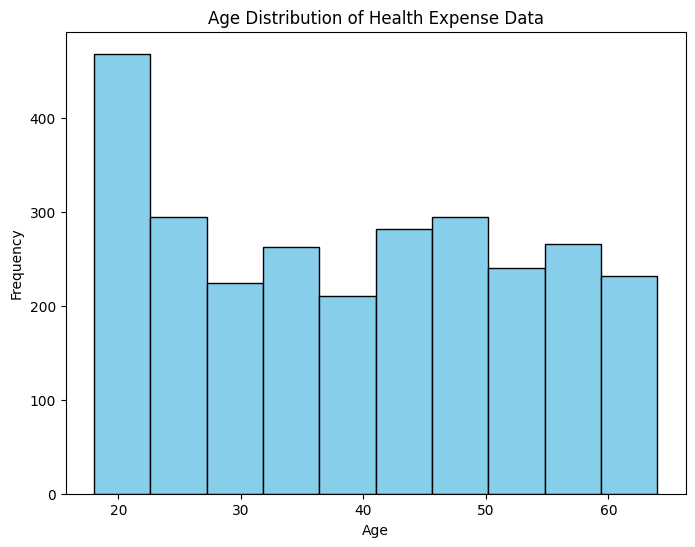

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(health_expense_data["age"], bins=10, color="skyblue", edgecolor="black")
plt.title('Age Distribution of Health Expense Data')
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.show()

/var/folders/g6/2vpn8j992hg688vyx5njjx_r0000gn/T/ipykernel_47786/1588256194.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


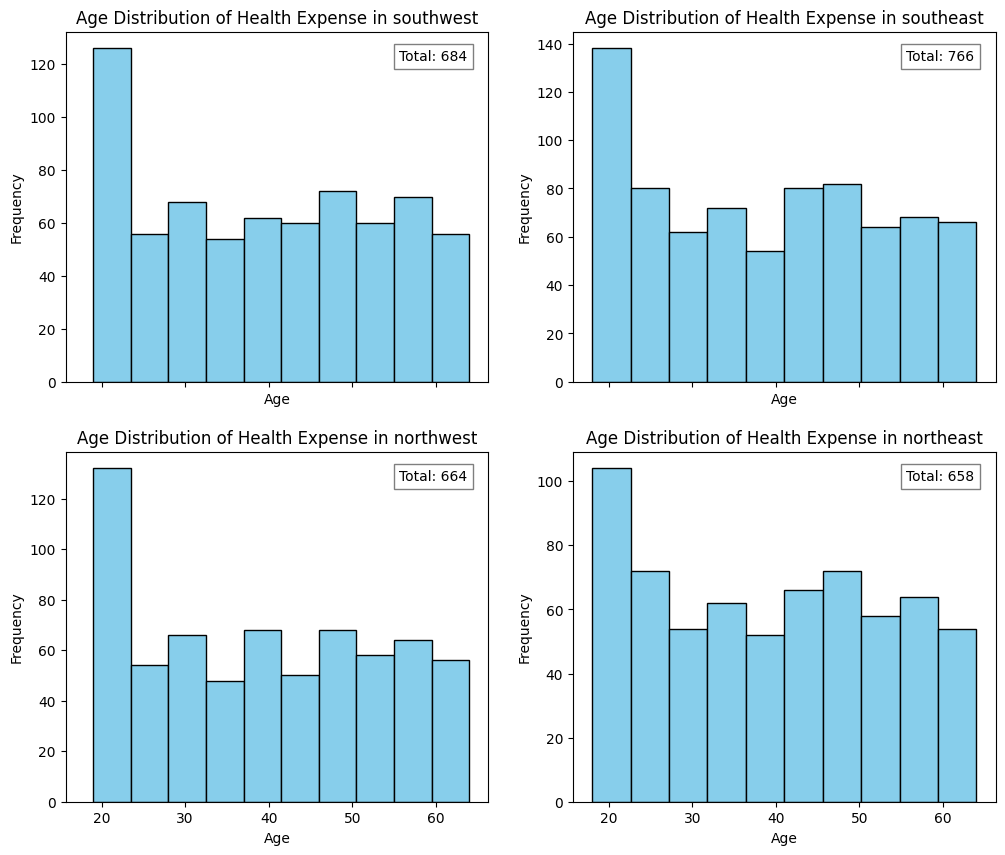

In [12]:
regions = health_expense_data["region"].unique()
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), sharex=True)
axs = axs.flatten()
for i, region in enumerate(regions):
    region_data = health_expense_data[health_expense_data["region"] == region]
    ages = region_data["age"]

    axs[i].hist(ages, bins=10, color="skyblue", edgecolor="black")
    axs[i].set_title(f'Age Distribution of Health Expense in {region}')
    axs[i].set_xlabel('Age')
    axs[i].set_ylabel('Frequency')

    total_people = len(region_data)
    axs[i].text(x=0.95, y=0.95, s=f"Total: {total_people}", horizontalalignment='right', verticalalignment='top',
                transform=axs[i].transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

fig.show()

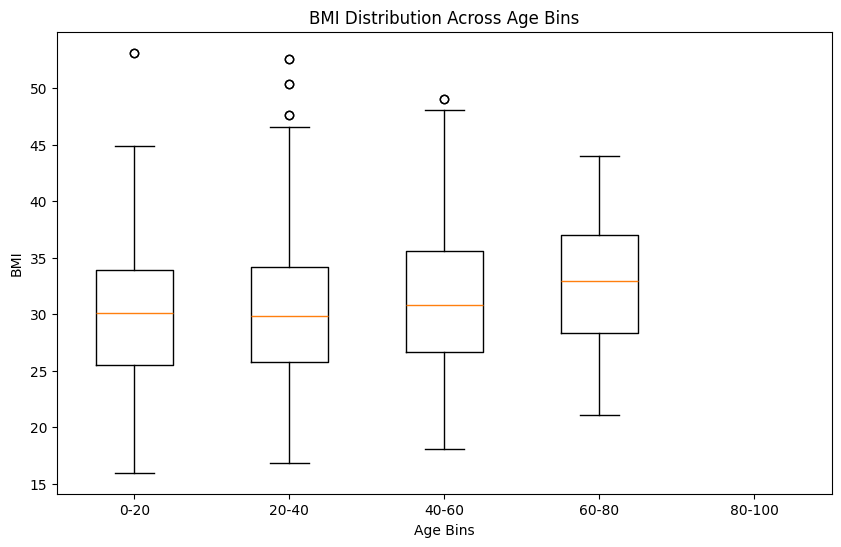

In [15]:
age_bins = [0, 20, 40, 60, 80, 100]

health_expense_data['age_bin'] = pd.cut(health_expense_data['age'], bins=age_bins, labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

plt.figure(figsize=(10, 6))
plt.boxplot([health_expense_data[health_expense_data['age_bin'] == bin]['bmi'] for bin in ['0-20', '20-40', '40-60', '60-80', '80-100']],
            labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

plt.xlabel("Age Bins")
plt.ylabel("BMI")
plt.title("BMI Distribution Across Age Bins")
plt.show()

/var/folders/g6/2vpn8j992hg688vyx5njjx_r0000gn/T/ipykernel_47786/2920660425.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_smoker_counts = health_expense_data.groupby(['age_bin', 'smoker']).size().unstack(fill_value=0)


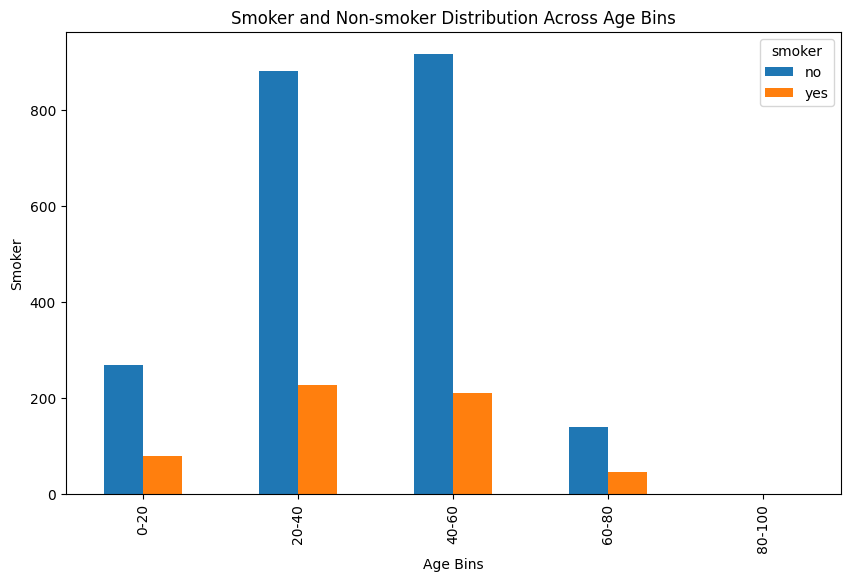

In [20]:
age_bins = [0, 20, 40, 60, 80, 100]

age_smoker_counts = health_expense_data.groupby(['age_bin', 'smoker']).size().unstack(fill_value=0)

age_smoker_counts.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.xlabel("Age Bins")
plt.ylabel("Smoker")
plt.title("Smoker and Non-smoker Distribution Across Age Bins")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [31]:
health_expense_data.replace({'sex':{'male': 0, 'female':1}}, inplace=True)
health_expense_data.replace({'smoker': {'no': 0, 'yes': 1}}, inplace=True)
health_expense_data.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)
health_expense_data = health_expense_data.drop('age_bin', axis=1)
health_expense_data

,age,sex,bmi,children,smoker,region,charges,selfemp,married,insurance,ethnicity,education
0,19,1,27.900,0,1,1,16884.92400,0,0,0,0,2
1,18,0,26.180,2,0,0,2304.00220,0,0,1,1,2
2,18,1,30.305,0,0,2,2203.73595,0,0,1,1,2
3,18,0,23.210,0,0,0,1121.87390,0,0,0,0,0
4,20,0,29.735,0,0,3,1769.53165,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2767,61,0,38.380,0,0,3,12950.07120,0,1,1,0,0
2768,62,0,32.015,0,1,2,45710.20785,0,1,1,0,0
2769,62,1,31.730,0,0,2,14043.47670,0,1,1,1,0
2770,64,0,40.480,0,0,0,13831.11520,0,1,1,1,0


In [32]:
X = health_expense_data.drop('charges', axis=1)
Y = health_expense_data["charges"]

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(2772, 11) (2217, 11) (555, 11)


In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train, Y_train)

LinearRegression()

In [37]:
train_pred = model.predict(X_train)
r2_train = metrics.r2_score(Y_train, train_pred)
r2_train

0.7559737987432541

In [38]:
train_mse = metrics.mean_squared_error(Y_train, train_pred)
train_mse

36422689.548643366

In [39]:
test_pred = model.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_pred)
print(r2_test)

test_mse = metrics.mean_squared_error(Y_test, test_pred)
print(test_mse)

0.7283427006750633
38314573.684917346


In [40]:
from sklearn.linear_model import Ridge

In [41]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, Y_train)

Ridge()

In [42]:
ridge_reg.coef_

array([  267.95756429,    90.19493885,   327.27181147,   447.69295869,
       23964.80390996,   235.60651479,   126.79554933,  -704.38078723,
        -113.63536719,   -43.69544699,    49.80262742])

In [43]:
ridge_train_pred = ridge_reg.predict(X_train)
ridge_r2 = metrics.r2_score(Y_train, ridge_train_pred)
print(ridge_r2)
ridge_train_mse = metrics.mean_squared_error(Y_train, ridge_train_pred)
print(ridge_train_mse)


0.7559690019985286
36423405.49776311


In [44]:
ridge_test_pred = ridge_reg.predict(X_test)
ridge_test_r2 = metrics.r2_score(Y_test, ridge_test_pred)
print(ridge_test_r2)

ridge_test_mse = metrics.mean_squared_error(Y_test, ridge_test_pred)
print(ridge_test_mse)

0.7283546355265866
38312890.39222011


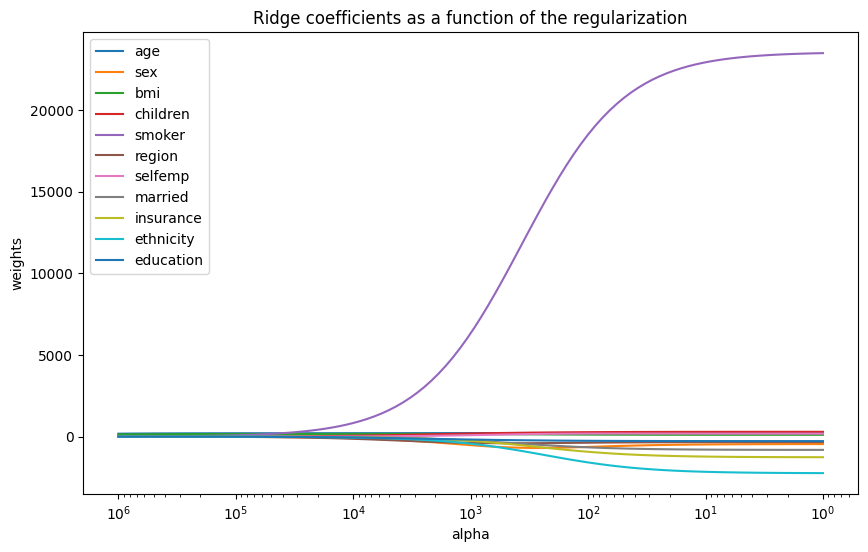

In [61]:
pred_list = X.columns.tolist()
# Define the range of alpha values
n_alphas = 100
alphas = np.logspace(0, 6, n_alphas)

# Fit ridge regression for each alpha and store the coefficients
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)

# Plot the coefficients against alpha values
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
ax = plt.gca()
for i, coef in enumerate(np.array(coefs).T):
    ax.plot(alphas, coef, label=f"{pred_list[i]}")  # Add label for each predictor

ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.legend()
plt.show()


In [45]:
from sklearn.linear_model import Lasso

In [46]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, Y_train)

Lasso()

In [47]:
lasso_reg.coef_

array([  267.99078811,    90.40653557,   327.24109922,   447.25924761,
       24024.59867669,   235.94345692,   115.71742199,  -701.33455334,
        -107.69326601,   -31.80635384,    49.05500142])

In [48]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'selfemp',
       'married', 'insurance', 'ethnicity', 'education'],
      dtype='object')

In [63]:
lasso_train_pred = lasso_reg.predict(X_train)
lasso_train_r2 = metrics.r2_score(Y_train, lasso_train_pred)
print(lasso_train_r2)

lasso_train_mse = metrics.mean_squared_error(Y_train, lasso_train_pred)
print(lasso_train_mse)

0.7561939470383787
35385427.507099874


In [64]:
lasso_test_pred = lasso_reg.predict(X_test)
lasso_test_r2 = metrics.r2_score(Y_test, lasso_test_pred)
print(lasso_test_r2)

lasso_test_mse = metrics.mean_squared_error(Y_test, lasso_test_pred)
print(lasso_test_mse)

0.7272247698539962
42931168.608398594


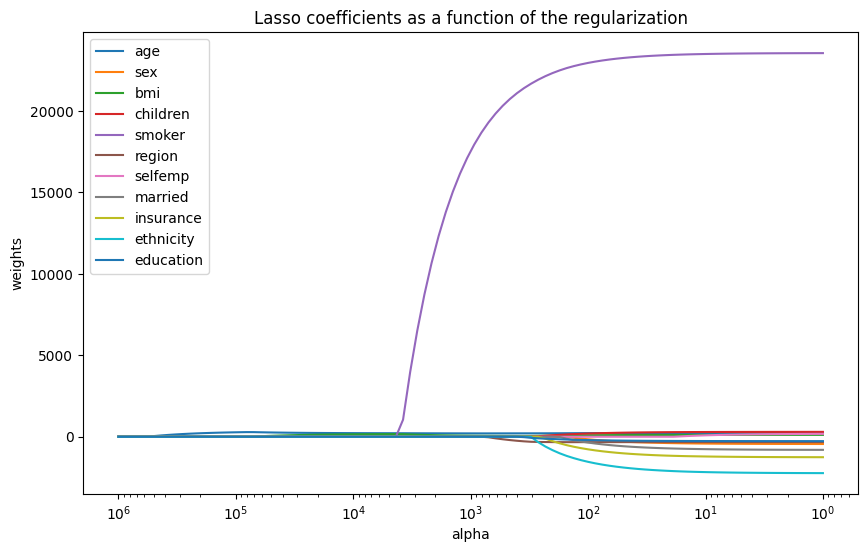

In [63]:
# Define the range of alpha values
n_alphas = 100
alphas = np.logspace(0, 6, n_alphas)

# Fit ridge regression for each alpha and store the coefficients
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)

# Plot the coefficients against alpha values
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
ax = plt.gca()
for i, coef in enumerate(np.array(coefs).T):
    ax.plot(alphas, coef, label=f"{pred_list[i]}")  # Add label for each predictor

ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.legend()
plt.show()
